# Objectives {.unnumbered}

By the end of this lab, you will:
1. Load and analyze the **Lightcast dataset** in **Spark DataFrame**.
2. Create **five easy and three medium-complexity visualizations** using **Plotly**.
3. Explore **salary distributions, employment trends, and job postings**.
4. Analyze **skills in relation to NAICS/SOC/ONET codes and salaries**.
5. Customize **colors, fonts, and styles** in all visualizations (**default themes result in a 2.5-point deduction**).
6. Follow **best practices for reporting on data communication**.

# Step 1: Load the Dataset {.unnumbered}


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load Data
df = pd.read_csv(r"C:\Users\hongj\lab06-JianhaoHong\lightcast_job_postings.csv")

# Show Schema and Sample Data
df.head(5)


,ID,LAST_UPDATED_DATE,LAST_UPDATED_TIMESTAMP,DUPLICATES,POSTED,EXPIRED,DURATION,SOURCE_TYPES,SOURCES,URL,...,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
0,1f57d95acf4dc67ed2819eb12f049f6a5c11782c,2024-09-06,2024-09-06 20:32:57.352 Z,0,2024-06-02,2024-06-08,6.0,"[\n ""Company""\n]","[\n ""brassring.com""\n]","[\n ""https://sjobs.brassring.com/TGnewUI/Sear...",...,44,Retail Trade,441,Motor Vehicle and Parts Dealers,4413,"Automotive Parts, Accessories, and Tire Retailers",44133,Automotive Parts and Accessories Retailers,441330,Automotive Parts and Accessories Retailers
1,0cb072af26757b6c4ea9464472a50a443af681ac,2024-08-02,2024-08-02 17:08:58.838 Z,0,2024-06-02,2024-08-01,NaN,"[\n ""Job Board""\n]","[\n ""maine.gov""\n]","[\n ""https://joblink.maine.gov/jobs/1085740""\n]",...,56,Administrative and Support and Waste Managemen...,561,Administrative and Support Services,5613,Employment Services,56132,Temporary Help Services,561320,Temporary Help Services
2,85318b12b3331fa490d32ad014379df01855c557,2024-09-06,2024-09-06 20:32:57.352 Z,1,2024-06-02,2024-07-07,35.0,"[\n ""Job Board""\n]","[\n ""dejobs.org""\n]","[\n ""https://dejobs.org/dallas-tx/data-analys...",...,52,Finance and Insurance,524,Insurance Carriers and Related Activities,5242,"Agencies, Brokerages, and Other Insurance Rela...",52429,Other Insurance Related Activities,524291,Claims Adjusting
3,1b5c3941e54a1889ef4f8ae55b401a550708a310,2024-09-06,2024-09-06 20:32:57.352 Z,1,2024-06-02,2024-07-20,48.0,"[\n ""Job Board""\n]","[\n ""disabledperson.com"",\n ""dejobs.org""\n]","[\n ""https://www.disabledperson.com/jobs/5948...",...,52,Finance and Insurance,522,Credit Intermediation and Related Activities,5221,Depository Credit Intermediation,52211,Commercial Banking,522110,Commercial Banking
4,cb5ca25f02bdf25c13edfede7931508bfd9e858f,2024-06-19,2024-06-19 07:00:00.000 Z,0,2024-06-02,2024-06-17,15.0,"[\n ""FreeJobBoard""\n]","[\n ""craigslist.org""\n]","[\n ""https://modesto.craigslist.org/sls/77475...",...,99,Unclassified Industry,999,Unclassified Industry,9999,Unclassified Industry,99999,Unclassified Industry,999999,Unclassified Industry


# Salary Distribution by Employment Type
- Identify salary trends across different employment types.
- **Filter the dataset**
  - Remove records where **salary is missing or zero**.
- **Aggregate Data**
  - Group by **employment type** and compute salary distribution.
- **Visualize results**
  - Create a **box plot** where:
    - **X-axis** = `EMPLOYMENT_TYPE_NAME`
    - **Y-axis** = `SALARY_FROM`
  - Customize **colors, fonts, and styles** to avoid a **2.5-point deduction**.
- **Explanation:** Write two sentences about what the graph reveals.



Salary Distribution by Employment Type:
                           count          mean           std      min  \
EMPLOYMENT_TYPE_NAME                                                   
Full-time (> 32 hours)  30579.0  95042.603780  39686.611132  10230.0   
Part-time (≤ 32 hours)   1185.0  74000.372152  42700.793450  12000.0   
Part-time / full-time     644.0  81574.442547  54050.857259  15600.0   

                             25%      50%       75%       max  
EMPLOYMENT_TYPE_NAME                                           
Full-time (> 32 hours)  65000.00  89990.0  119443.0  800000.0  
Part-time (≤ 32 hours)  43160.00  65000.0   90000.0  500000.0  
Part-time / full-time   56345.25  72100.0   92598.5  455375.0   



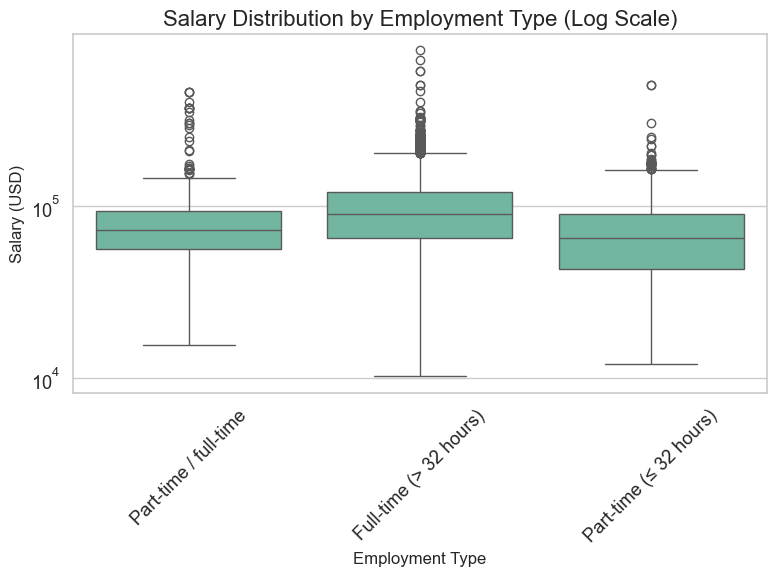

In [27]:
# Your Code for 1st question here
df_filtered = df.dropna(subset=['SALARY_FROM'])
df_filtered = df_filtered[df_filtered['SALARY_FROM'] > 0]


stats_by_type = df_filtered.groupby('EMPLOYMENT_TYPE_NAME')['SALARY_FROM'].describe()
print("Salary Distribution by Employment Type:\n", stats_by_type, "\n")


sns.set_theme(style="whitegrid", font="Arial", font_scale=1.2) 
custom_palette = sns.color_palette("Set2")  
sns.set_palette(custom_palette)


plt.figure(figsize=(8, 6))
sns.boxplot(
    x='EMPLOYMENT_TYPE_NAME', 
    y='SALARY_FROM', 
    data=df_filtered
)


plt.yscale('log')  


plt.title("Salary Distribution by Employment Type (Log Scale)", fontsize=16)
plt.xlabel("Employment Type", fontsize=12)
plt.ylabel("Salary (USD)", fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

First, we can see that the salary range varies greatly. Full-time (> 32 hours) positions have overall higher salaries and a higher median compared to part-time roles, indicating that full-time jobs generally offer higher pay.

# Salary Distribution by Industry
- Compare salary variations across industries.
- **Filter the dataset**
  - Keep records where **salary is greater than zero**.
- **Aggregate Data**
  - Group by **NAICS industry codes**.
- **Visualize results**
  - Create a **box plot** where:
    - **X-axis** = `NAICS2_NAME`
    - **Y-axis** = `SALARY_FROM`
  - Customize colors, fonts, and styles.
- **Explanation:** Write two sentences about what the graph reveals.

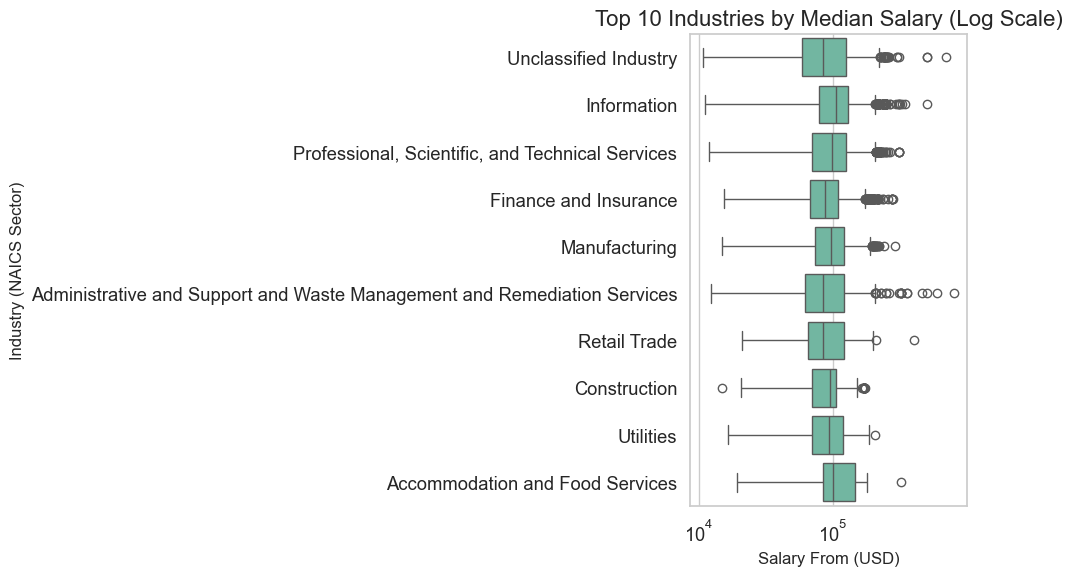

In [28]:
# Your code for 2nd question here
median_salary = df_filtered.groupby('NAICS2_NAME')['SALARY_FROM'].median().sort_values(ascending=False)

top_industries = median_salary.head(10).index.tolist()
df_top = df_filtered[df_filtered['NAICS2_NAME'].isin(top_industries)]

sns.set_theme(style="whitegrid", font="Arial", font_scale=1.2)
palette = sns.color_palette("Set2")
sns.set_palette(palette)

plt.figure(figsize=(10, 6))
sns.boxplot(
    y='NAICS2_NAME', 
    x='SALARY_FROM', 
    data=df_top,
    orient='h'  
)

plt.xscale('log')
plt.title("Top 10 Industries by Median Salary (Log Scale)", fontsize=16)
plt.xlabel("Salary From (USD)", fontsize=12)
plt.ylabel("Industry (NAICS Sector)", fontsize=12)
plt.tight_layout()
plt.show()

Due to the large number of industries, I decided to filter only the top 10 industries by median salary to create a clearer chart. Among them, “Unclassified Industry,” “Information,” and “Professional, Scientific, and Technical Services” show higher median salaries and more outliers, suggesting that these sectors include both high-paying positions and a wide range of job levels. In contrast, industries like “Utilities” and “Construction” show more compact distributions, indicating relatively stable and consistent salary levels.

# Job Posting Trends Over Time
- Analyze how job postings fluctuate over time.
- **Aggregate Data**
  - Count job postings per **posted date (`POSTED`)**.
- **Visualize results**
  - Create a **line chart** where:
    - **X-axis** = `POSTED`
    - **Y-axis** = `Number of Job Postings`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

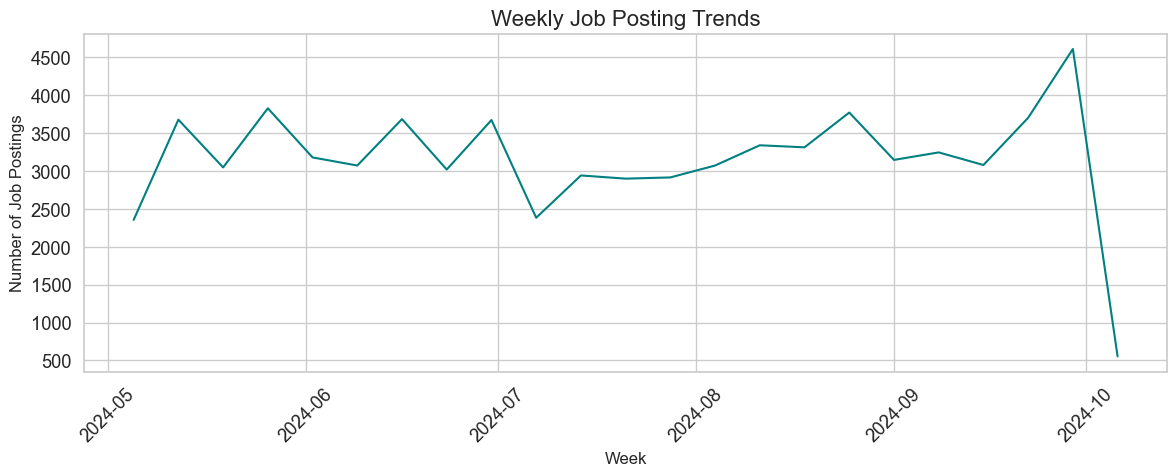

In [ ]:
# Your code for 3rd question here
df['POSTED'] = pd.to_datetime(df['POSTED'], errors='coerce')  
df = df.dropna(subset=['POSTED'])  
df = df.set_index('POSTED')


weekly_postings = df.resample('W').size().reset_index(name='Job_Postings')


sns.set_theme(style="whitegrid", font="Arial", font_scale=1.2)
plt.figure(figsize=(12, 5))
sns.lineplot(data=weekly_postings, x='POSTED', y='Job_Postings', color='teal')


plt.title("Weekly Job Posting Trends", fontsize=16)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From May to October 2024, the number of job postings remained generally stable but showed some fluctuations. Peaks appeared in early June and late September, possibly reflecting seasonal hiring surges. The sharp drop in early October is likely due to incomplete data collection for the most recent week.

# Top 10 Job Titles by Count
- Identify the most frequently posted job titles.
- **Aggregate Data**
  - Count the occurrences of each **job title (`TITLE_NAME`)**.
  - Select the **top 10 most frequent titles**.
- **Visualize results**
  - Create a **bar chart** where:
    - **X-axis** = `TITLE_NAME`
    - **Y-axis** = `Job Count`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

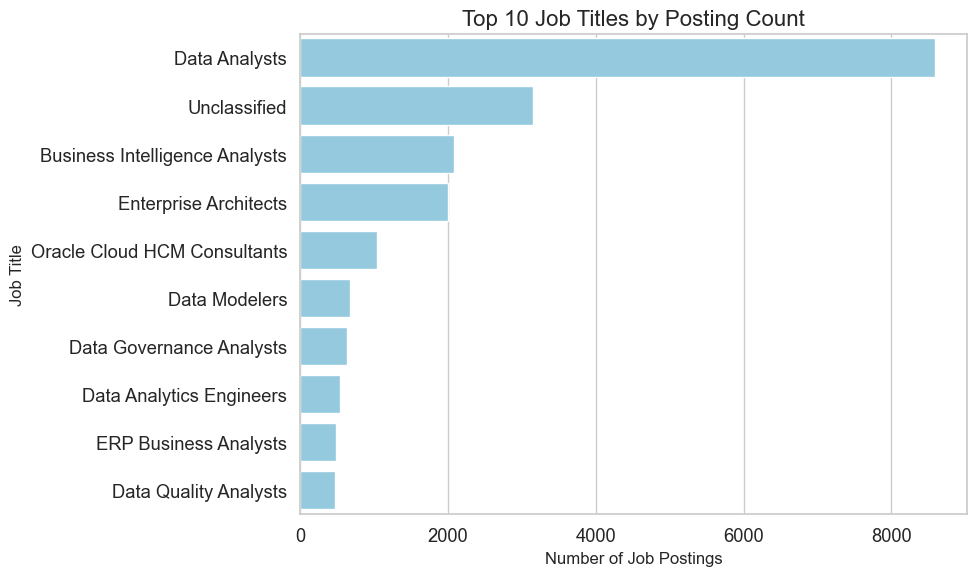

In [ ]:
# Your code for 4th question here
top_titles = df['TITLE_NAME'].value_counts().nlargest(10).reset_index()
top_titles.columns = ['TITLE_NAME', 'Job_Count']


sns.set_theme(style="whitegrid", font="Arial", font_scale=1.2)


plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_titles,
    y='TITLE_NAME',
    x='Job_Count',
    color='skyblue'  
)


plt.title("Top 10 Job Titles by Posting Count", fontsize=16)
plt.xlabel("Number of Job Postings", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.tight_layout()
plt.show()

We identified the top 10 most frequently posted job titles, with “Data Analysts” clearly leading, followed by “Unclassified” and “Business Intelligence Analysts.” Overall, roles related to data analysis and business intelligence show the highest demand, indicating the strong popularity and wide application of these skills in today’s job market.

# Remote vs On-Site Job Postings
- Compare the proportion of remote and on-site job postings.
- **Aggregate Data**
  - Count job postings by **remote type (`REMOTE_TYPE_NAME`)**.
- **Visualize results**
  - Create a **pie chart** where:
    - **Labels** = `REMOTE_TYPE_NAME`
    - **Values** = `Job Count`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

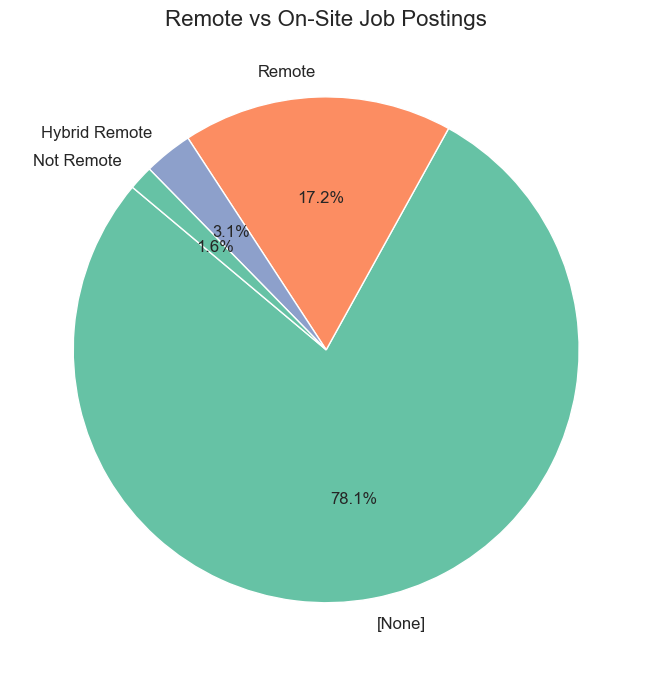

In [33]:
# Your code for 5th question here
remote_counts = df['REMOTE_TYPE_NAME'].value_counts().reset_index()
remote_counts.columns = ['REMOTE_TYPE_NAME', 'Job_Count']

# 3. 设置颜色和字体样式
plt.rcParams['font.family'] = 'Arial'  # 自定义字体
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # 自定义配色（可换）

# 4. 绘制饼图
plt.figure(figsize=(7, 7))
plt.pie(
    remote_counts['Job_Count'],
    labels=remote_counts['REMOTE_TYPE_NAME'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)

plt.title("Remote vs On-Site Job Postings", fontsize=16)
plt.tight_layout()
plt.show()

# Skill Demand Analysis by Industry (Stacked Bar Chart)
- Identify which skills are most in demand in various industries.
- **Aggregate Data**
  - Extract **skills** from job postings.
  - Count occurrences of skills grouped by **NAICS industry codes**.
- **Visualize results**
  - Create a **stacked bar chart** where:
    - **X-axis** = `Industry`
    - **Y-axis** = `Skill Count`
    - **Color** = `Skill`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

C:\Users\hongj\AppData\Local\Temp\ipykernel_112504\3989431857.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


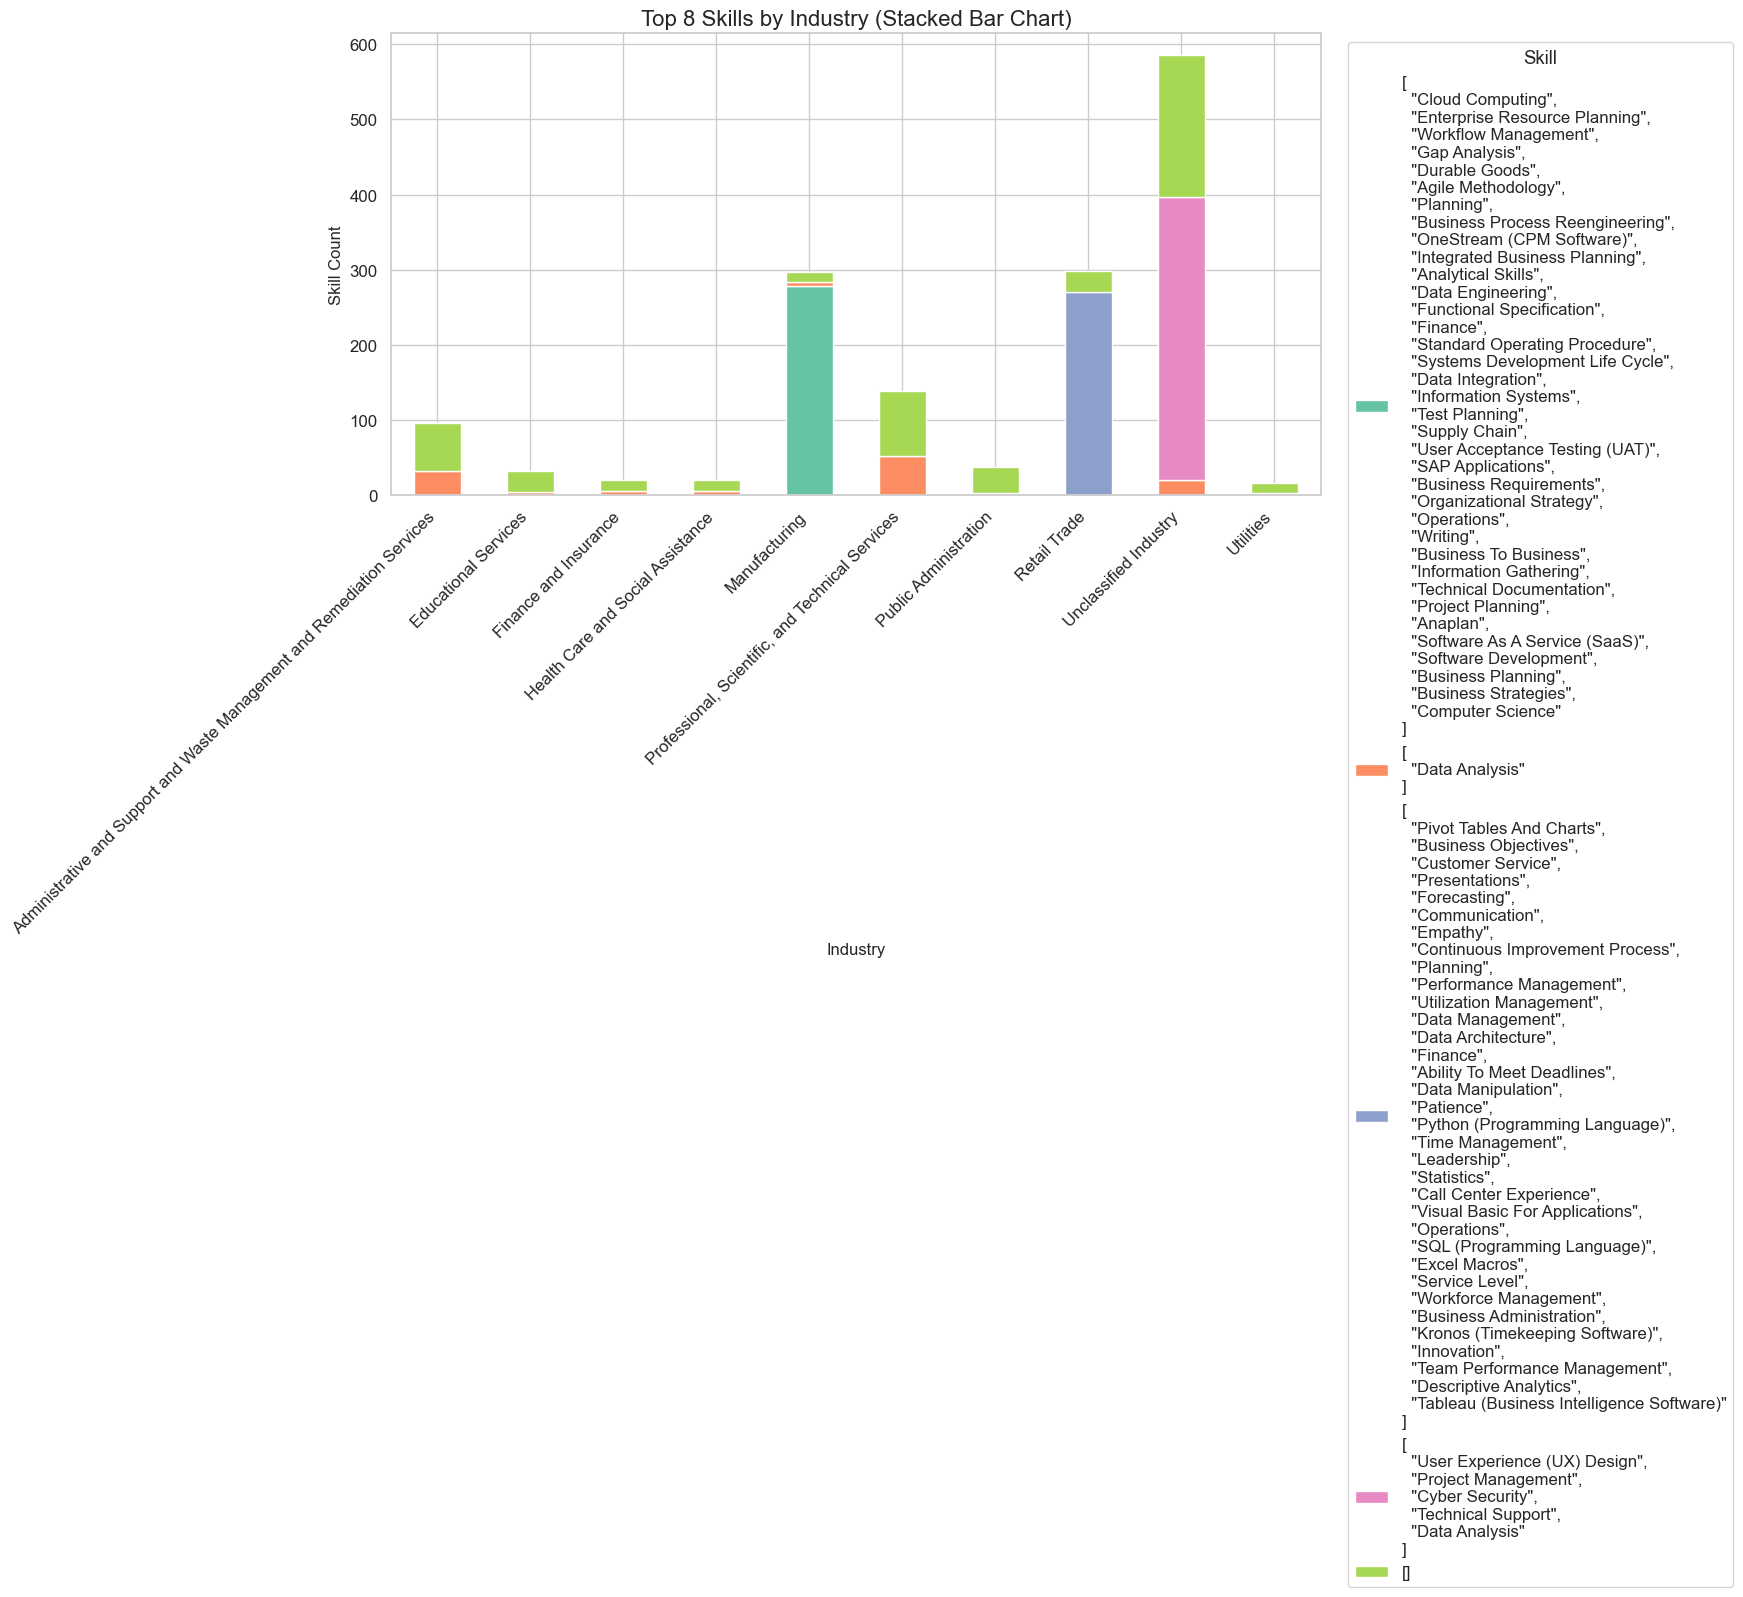

In [47]:
# Your code for 6th question here
df = df.dropna(subset=["NAICS2_NAME", "SKILLS_NAME"])

# 2. 按技能统计全局数量，取前N个
top_skills = df["SKILLS_NAME"].value_counts().nlargest(5).index

# 3. 过滤数据，只保留 top N 技能
filtered_df = df[df["SKILLS_NAME"].isin(top_skills)]

# 4. 按行业和技能分组计数
skill_by_industry = (
    filtered_df.groupby(["NAICS2_NAME", "SKILLS_NAME"])
    .size()
    .reset_index(name="COUNT")
)

# 5. 只保留 top 8 技能在出现次数最多的前10个行业
top_industries = skill_by_industry.groupby("NAICS2_NAME")["COUNT"].sum().nlargest(10).index
skill_by_industry = skill_by_industry[skill_by_industry["NAICS2_NAME"].isin(top_industries)]

# 6. 透视成堆叠图格式
pivot_df = skill_by_industry.pivot_table(
    index="NAICS2_NAME", columns="SKILLS_NAME", values="COUNT", fill_value=0
)

# 7. 可视化设置
sns.set_theme(style="whitegrid", font="Arial", font_scale=1.1)
colors = sns.color_palette("Set2", n_colors=pivot_df.shape[1])

# 8. 绘图
pivot_df.plot(kind="bar", stacked=True, figsize=(12, 6), color=colors)

plt.title("Top 8 Skills by Industry (Stacked Bar Chart)", fontsize=16)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Skill Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Skill", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


# Salary Analysis by ONET Occupation Type (Bubble Chart)
- Analyze how salaries differ across ONET occupation types.
- **Aggregate Data**
  - Compute **median salary** for each occupation in the **ONET taxonomy**.
- **Visualize results**
  - Create a **bubble chart** where:
    - **X-axis** = `ONET_NAME`
    - **Y-axis** = `Median Salary`
    - **Size** = Number of job postings
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

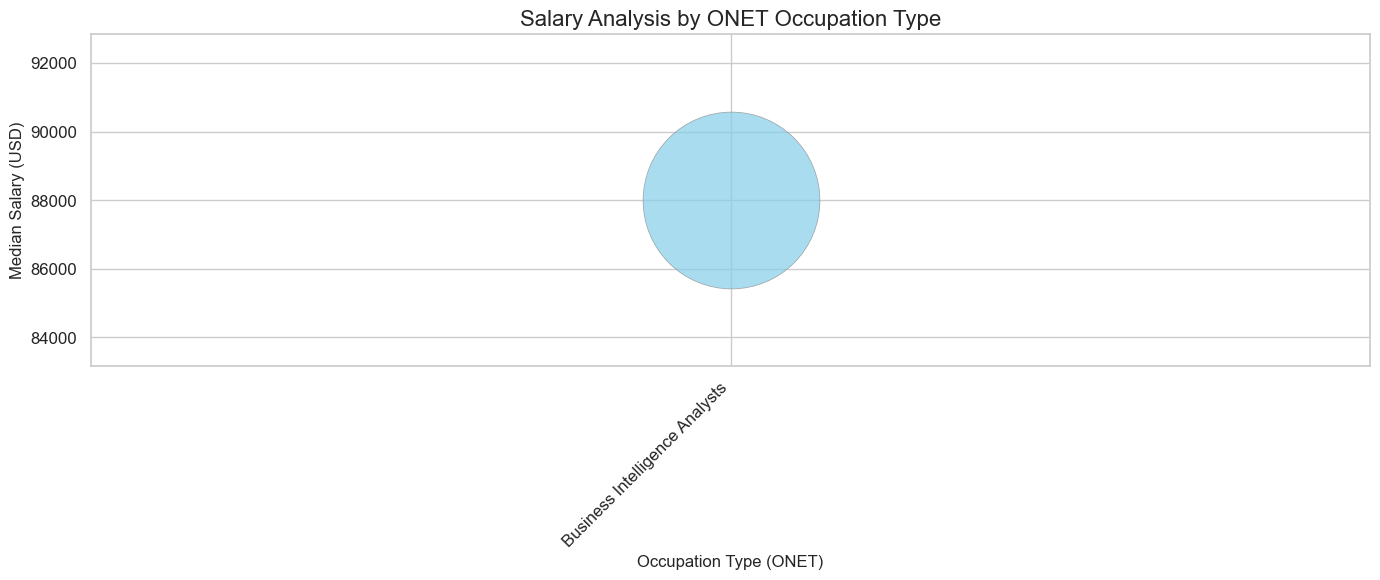

In [48]:
# Your code for 7th question here
df = df.dropna(subset=["SALARY_FROM", "ONET_NAME"])
df = df[df["SALARY_FROM"] > 0]

# 3. 聚合：按 ONET_NAME 统计中位数薪资和发布数量
onet_stats = df.groupby("ONET_NAME").agg(
    Median_Salary=("SALARY_FROM", "median"),
    Job_Postings=("SALARY_FROM", "count")
).reset_index()

# 4. 可选：只取前 15~20 个职位，防止标签太多
top_onets = onet_stats.sort_values("Job_Postings", ascending=False).head(20)

# 5. 可视化设置
sns.set_theme(style="whitegrid", font="Arial", font_scale=1.1)
plt.figure(figsize=(14, 6))

# 6. 绘图（Bubble Chart）
plt.scatter(
    x=top_onets["ONET_NAME"],
    y=top_onets["Median_Salary"],
    s=top_onets["Job_Postings"] / 2,   # 控制气泡大小（可以调整缩放系数）
    alpha=0.7,
    c="skyblue",
    edgecolors="gray",
    linewidths=0.5
)

# 7. 添加标题和轴标签
plt.xticks(rotation=45, ha="right")
plt.xlabel("Occupation Type (ONET)", fontsize=12)
plt.ylabel("Median Salary (USD)", fontsize=12)
plt.title("Salary Analysis by ONET Occupation Type", fontsize=16)
plt.tight_layout()
plt.show()

# Career Pathway Trends (Sankey Diagram)
- Visualize job transitions between different occupation levels.
- **Aggregate Data**
  - Identify career transitions between **SOC job classifications**.
- **Visualize results**
  - Create a **Sankey diagram** where:
    - **Source** = `SOC_2021_2_NAME`
    - **Target** = `SOC_2021_3_NAME`
    - **Value** = Number of transitions
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


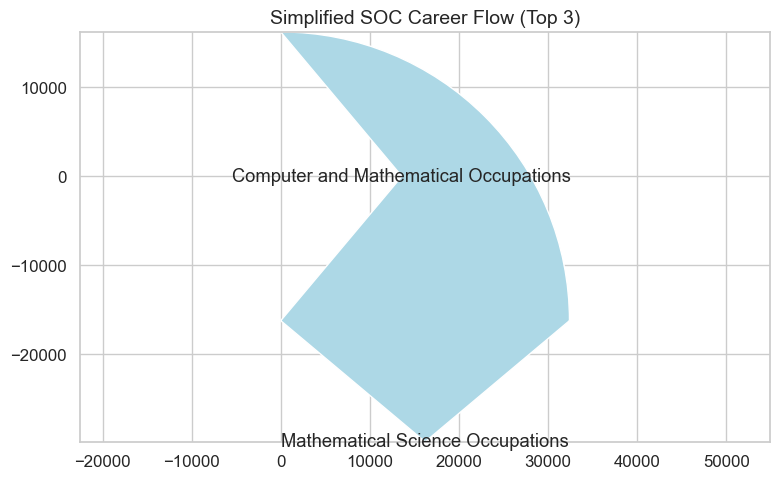

In [50]:
# Your code for 8th question here
from matplotlib.sankey import Sankey
df = df.dropna(subset=["SOC_2021_2_NAME", "SOC_2021_3_NAME"])
flow_df = df.groupby(["SOC_2021_2_NAME", "SOC_2021_3_NAME"]).size().reset_index(name="Count")

# Step 3: 取前 3 个流向（适合 sankey 线性图）
top_flows = flow_df.sort_values("Count", ascending=False).head(3)

# Step 4: 构造 sankey 所需参数
flows = []
labels = []
orientations = []

total_in = top_flows["Count"].sum()
flows.append(total_in)  # 汇入流
labels.append(top_flows.iloc[0]["SOC_2021_2_NAME"])
orientations.append(0)

# 每个 target 单独一条出流
for i in range(len(top_flows)):
    flows.append(-top_flows.iloc[i]["Count"])
    labels.append(top_flows.iloc[i]["SOC_2021_3_NAME"])
    orientations.append((i % 2) * 2 - 1)  # 上下交错显示

# Step 5: 绘图
fig = plt.figure(figsize=(8, 5))
sankey = Sankey(ax=fig.add_subplot(1, 1, 1), unit=None)
sankey.add(flows=flows, labels=labels, orientations=orientations, facecolor='lightblue')
sankey.finish()
plt.title("Simplified SOC Career Flow (Top 3)", fontsize=14)
plt.tight_layout()
plt.show()